In [ ]:
## Classification using Logistic Regression
import pandas as pd
import numpy as np
import re
import nltk
import string
import os
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')
products = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DWDM/amazon_baby.csv')
products.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [ ]:
len(products) - len(products.dropna())

1147

In [ ]:
len(products)

183531

In [ ]:
products = products.dropna()

In [ ]:
for i in range(0,len(products)-1):
    if type(products.iloc[i]['review']) != str:
        products.iloc[i]['review'] = str(products.iloc[i]['review'])

In [ ]:
products = products[products['rating'] != 3]

In [ ]:
def sentiment_pred(n):
    return 1 if n >= 4 else 0
products['sentiment'] = products['rating'].apply(sentiment_pred)
products.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,1


In [ ]:
scores = products['rating']

In [ ]:
print("The mean of output classes in the dataset is:")
print(scores.mean())
print("The standard deviation of the output classes in the dataset is:")
print(scores.std())

The mean of output classes in the dataset is:
4.232033027722283
The standard deviation of the output classes in the dataset is:
1.2960315168252163


In [ ]:
# Distribution of the Training Output classes.
products.groupby('sentiment')['review'].count()

sentiment
0     26361
1    139318
Name: review, dtype: int64

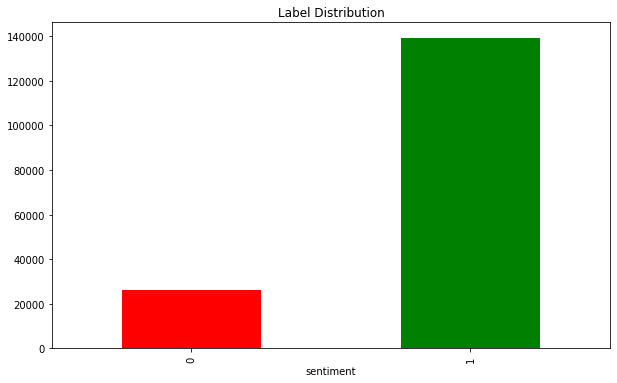

In [ ]:
# Plotting the sentiment 0 and 1 using a bar graph
products.groupby('sentiment')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [ ]:
## Pre Processing Steps which uses lemmatizer and stopwords to clean the reviews.
lemmatizer = nltk.WordNetLemmatizer()
nltk.download('stopwords')
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    stops = stopwords.words('english')
    stops.remove('not')
    stops.remove('no')
    line = [word for word in line if word not in stops]
    for t in line:
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X=products['review']
y=products['sentiment']

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
data = []
for p in products['review']:
    data.append(preprocessing(p))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,max_df = 0.7,norm='l2', encoding='latin-1', ngram_range=(1, 2),
stop_words='english')

In [ ]:
X_tfidf = tfidf.fit_transform(data)

In [ ]:
# Splitting the dataset in training dataset and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=0)

In [ ]:
# Applying the Logistic regression model
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_class = model.predict(X_test)

In [ ]:
# Classification report & confusion matrix for Logistic Regression
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred_class))
print("\n")
print("Classification Report\n",classification_report(y_test,y_pred_class))

Confusion Matrix
 [[ 4038  2528]
 [  518 34336]]


Classification Report
               precision    recall  f1-score   support

           0       0.89      0.61      0.73      6566
           1       0.93      0.99      0.96     34854

    accuracy                           0.93     41420
   macro avg       0.91      0.80      0.84     41420
weighted avg       0.92      0.93      0.92     41420



In [ ]:
print("Accuracy of Logistic Regression : ",accuracy_score(y_test,y_pred_class)*100)

Accuracy of Logistic Regression :  92.64606470304201


In [ ]:
# Applying the Multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Classification report & confusion matrix of Naive Bayes model
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Classification Report\n",classification_report(y_test,y_pred))

Confusion Matrix
 [[  980  5586]
 [   44 34810]]


Classification Report
               precision    recall  f1-score   support

           0       0.96      0.15      0.26      6566
           1       0.86      1.00      0.93     34854

    accuracy                           0.86     41420
   macro avg       0.91      0.57      0.59     41420
weighted avg       0.88      0.86      0.82     41420



In [ ]:
print("Accuracy of Naive Bayes : ",accuracy_score(y_test,y_pred)*100)

Accuracy of Naive Bayes :  86.40753259295026


In [ ]:
from sklearn.svm import LinearSVC
clf1 = LinearSVC()

# Fit train and test into the model
clf1.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred_class1 = clf1.predict(X_test)

In [ ]:
# Classification report & confusion matrix of SVM model
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred_class1))
print("\n")
print("Classification Report\n",classification_report(y_test,y_pred_class1))

Confusion Matrix
 [[ 4693  1873]
 [  876 33978]]


Classification Report
               precision    recall  f1-score   support

           0       0.84      0.71      0.77      6566
           1       0.95      0.97      0.96     34854

    accuracy                           0.93     41420
   macro avg       0.90      0.84      0.87     41420
weighted avg       0.93      0.93      0.93     41420



In [ ]:
print("Accuracy of SVM : ",accuracy_score(y_test,y_pred_class1)*100)

Accuracy of SVM :  93.3631096088846
